## Student Performance Indicator


#### 1) Problem Statement
This project understands how the students performance is affected by other variables

#### 2) Data Collection
Data source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977 

The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#read data from csv file as pandas dataframe
df =pd.read_csv('stud.csv')

In [4]:
#see top 5 records
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
#shape of dataset
df.shape

(1000, 8)

### 2.2 Dataset Information

In [6]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

### Data checks to perform
* Missing values
* Duplicates
* data types
* number of unique values per column
* statistics of data set
* various categories present in different categorical column

### 3.1 Missing values

In [7]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

there are no missing values

### 3.2 Duplicates

In [8]:
df.duplicated().sum()

np.int64(0)

There are no duplicates

### 3.3 Check data types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 check the number of unique values of each column

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of data set

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
-  From above description of numerical data all means are very close to each other between 66 & 69
-  All standar deviation are also close between 14.6 and 15.19
-  While there is minimum 0 for math for writing minimum is much higher =10 and for reading yet higher 17

### Exploring data

In [12]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
print("categories in 'gender' variable:", end = " ")
print(df["gender"].unique())

print("categories in 'ethnicity' variable:", end = " ")
print(df["race_ethnicity"].unique())

print("categories in 'parents education level' variable:", end = " ")
print(df["parental_level_of_education"].unique())

print("categories in 'lunch' variable:", end = " ")
print(df["lunch"].unique())

print("categories in 'test preparation course' variable:", end = " ")
print(df["test_preparation_course"].unique())

categories in 'gender' variable: ['female' 'male']
categories in 'ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parents education level' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable: ['standard' 'free/reduced']
categories in 'test preparation course' variable: ['none' 'completed']


In [19]:
# define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(' we have {} numerical feature : {}'.format(len(numeric_features), numeric_features))
print(' \nwe have {} categorical feature : {}'.format(len(categorical_features), categorical_features))

 we have 3 numerical feature : ['math_score', 'reading_score', 'writing_score']
 
we have 5 categorical feature : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.8 Adding columns for "Total Score" and "Average"

In [21]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [30]:
reading_full=df[df['reading_score']==100]['average'].count()
writing_full=df[df['writing_score']==100]['average'].count()
math_full=df[df['math_score']== 100]['average'].count()

print(f'Number of students with full in maths: {math_full}')
print(f'Number of students with full in reading: {reading_full}')
print(f'Number of students with full in writing: {writing_full}')

Number of students with full in maths: 7
Number of students with full in reading: 17
Number of students with full in writing: 14


In [31]:
reading_less20=df[df['reading_score']<=20]['average'].count()
writing_less20=df[df['writing_score']<=20]['average'].count()
math_less20=df[df['math_score']<=20]['average'].count()

print(f'Number of students with less than 20 in maths: {math_less20}')
print(f'Number of students with less than 20 in reading: {reading_less20}')
print(f'Number of students with less than 20 in writing: {writing_less20}')

Number of students with less than 20 in maths: 4
Number of students with less than 20 in reading: 1
Number of students with less than 20 in writing: 3


- From this we can observe that students have performed the worst in maths
- best performance is in reading

### Exploring Data - Visualization
#### 4.1 Visualize average score distribution to make some conclusion
- histogram
- Kernel distributing function

#### 4.1.1 Histogram & KDE

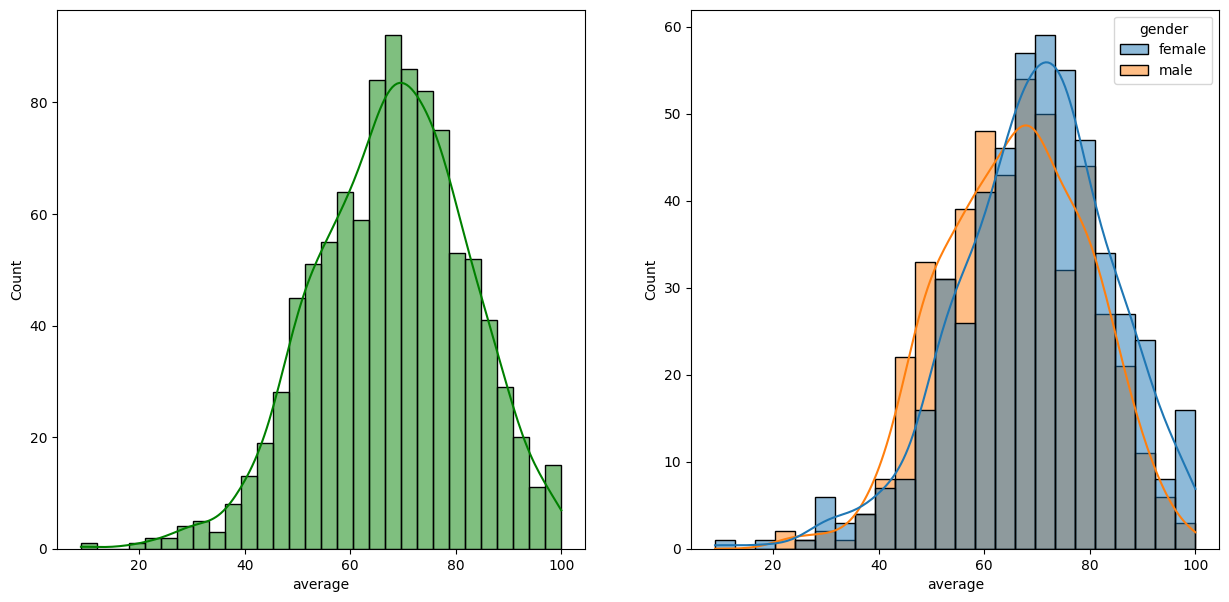

In [34]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

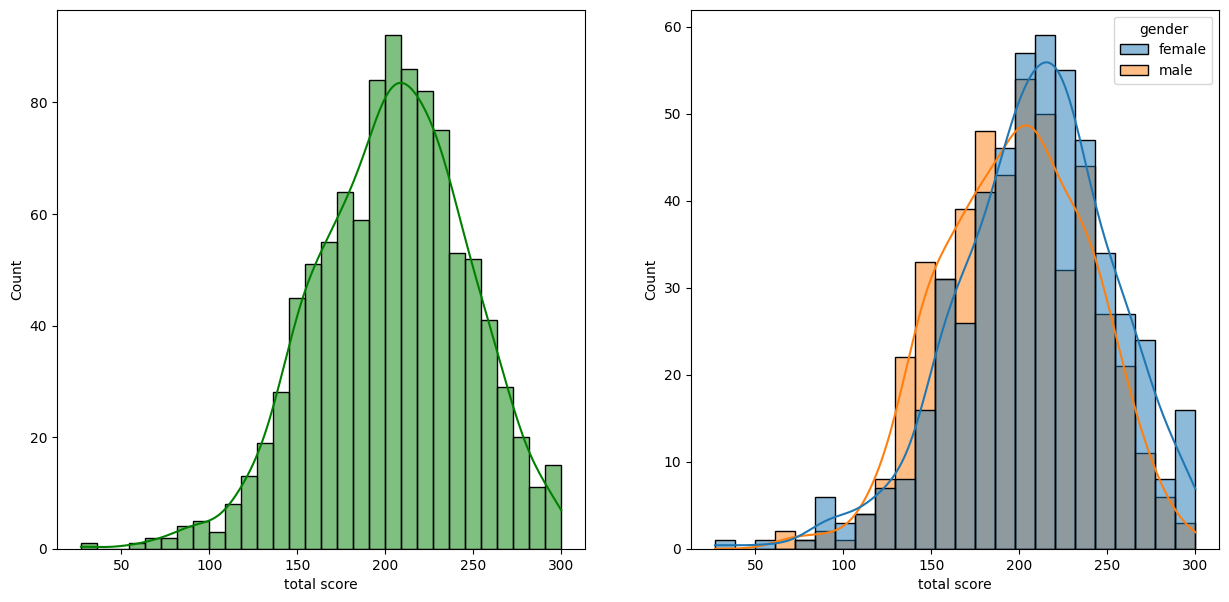

In [35]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

Female students tend to perform better

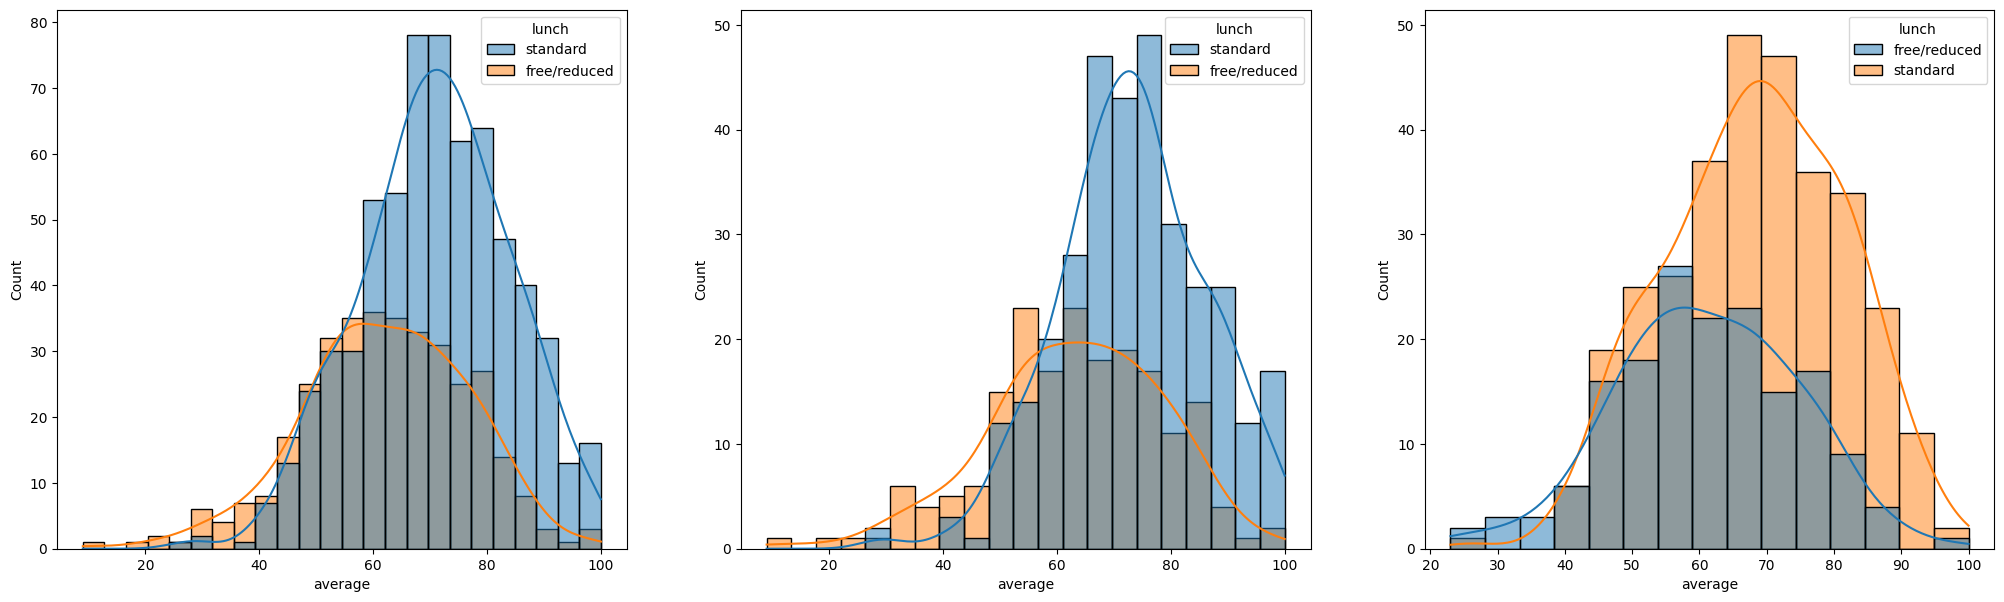

In [45]:
plt.subplots(1,3,figsize=(25,7))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,hue='lunch')
plt.show()

### Insights
- Standard lunch helps perform well in exams
- Standard lunch helps perform well for both male and female